In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

# Data Wrangling

In [2]:
#load and explore trip dataset
trip= pd.read_csv('trip.csv')

In [3]:
trip.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [4]:
trip.dtypes

id                     int64
duration               int64
start_date            object
start_station_name    object
start_station_id       int64
end_date              object
end_station_name      object
end_station_id         int64
bike_id                int64
subscription_type     object
zip_code              object
dtype: object

In [5]:
trip.isnull().sum()

id                       0
duration                 0
start_date               0
start_station_name       0
start_station_id         0
end_date                 0
end_station_name         0
end_station_id           0
bike_id                  0
subscription_type        0
zip_code              6619
dtype: int64

In [6]:
# change start_date and end_date to  datetime formate
trip['start_date']= pd.to_datetime(trip['start_date'],format='%m/%d/%Y %H:%M')
trip['end_date']= pd.to_datetime(trip['end_date'],format='%m/%d/%Y %H:%M')

In [7]:
# Question : should I remove the duration outliers ?

In [8]:
trip.duration = trip.duration/60

In [9]:
trip.duration.describe()

count    669959.000000
mean         18.465831
std         370.923950
min           1.000000
25%           5.733333
50%           8.616667
75%          12.583333
max      287840.000000
Name: duration, dtype: float64

/Users/ruicao/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


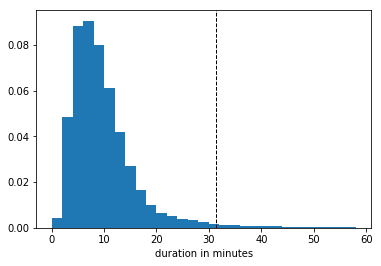

In [10]:
plt.hist(trip.duration,normed=True,bins=range(0,60,2))
plt.axvline(np.percentile(trip.duration,95), color='k', linestyle='dashed', linewidth=1)
plt.xlabel('duration in minutes')
plt.show()

In [11]:
# remove outliers for trip duration more than 6 hrs
trip = trip[trip.duration<=360]

In [12]:
trip.shape

(666872, 11)

In [13]:
# add some new columns
trip['date']=trip['start_date'].dt.date
trip['day']=trip['start_date'].dt.dayofweek
trip['hour']=trip['start_date'].dt.hour
trip['month']=trip['start_date'].dt.month
trip['week']=trip['start_date'].dt.week

In [14]:
# rename columns day and month
trip.day= trip.day.map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})
trip.month = trip.month.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

In [15]:
# add holiday columns
cal = calendar()
holidays = cal.holidays(start = trip.date.min(),end=trip.date.max())

In [16]:
holidays

DatetimeIndex(['2013-09-02', '2013-10-14', '2013-11-11', '2013-11-28',
               '2013-12-25', '2014-01-01', '2014-01-20', '2014-02-17',
               '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13',
               '2014-11-11', '2014-11-27', '2014-12-25', '2015-01-01',
               '2015-01-19', '2015-02-16', '2015-05-25', '2015-07-03'],
              dtype='datetime64[ns]', freq=None)

In [17]:
trip['holiday']= trip.date.apply(lambda x: x in(holidays))

In [18]:
# add workingday columns
workingday = ['Monday','Tuesday','Wednesday','Thursday','Friday']

In [19]:
trip['workingday']=trip.day.isin(workingday)

In [20]:
# delte unusful columns and change some columns datatype
trip.drop(['id','bike_id','zip_code'],axis=1,inplace=True)
for col in ['start_station_name','start_station_id','end_station_name','end_station_id','subscription_type','date','day','hour','week','month','week','holiday','workingday']:
    trip[col]=trip[col].astype('category')

In [21]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 666872 entries, 0 to 669958
Data columns (total 15 columns):
duration              666872 non-null float64
start_date            666872 non-null datetime64[ns]
start_station_name    666872 non-null category
start_station_id      666872 non-null category
end_date              666872 non-null datetime64[ns]
end_station_name      666872 non-null category
end_station_id        666872 non-null category
subscription_type     666872 non-null category
date                  666872 non-null category
day                   666872 non-null category
hour                  666872 non-null category
month                 666872 non-null category
week                  666872 non-null category
holiday               666872 non-null category
workingday            666872 non-null category
dtypes: category(12), datetime64[ns](2), float64(1)
memory usage: 28.7 MB


In [22]:
# load and explore station file
station= pd.read_csv('station.csv')

In [23]:
station.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [24]:
station.dtypes

id                     int64
name                  object
lat                  float64
long                 float64
dock_count             int64
city                  object
installation_date     object
dtype: object

In [25]:
station.isnull().sum()

id                   0
name                 0
lat                  0
long                 0
dock_count           0
city                 0
installation_date    0
dtype: int64

In [26]:
# change columns type
for col in ['name','city']:
    station[col]=station[col].astype('category')

In [27]:
# convert installation_date to datetime formate
station['installation_date']=pd.to_datetime(station.installation_date)

In [28]:
station.shape

(70, 7)

In [29]:
# load and explore weather file
weather = pd.read_csv('weather.csv')

In [30]:
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107


In [31]:
weather.dtypes

date                               object
max_temperature_f                 float64
mean_temperature_f                float64
min_temperature_f                 float64
max_dew_point_f                   float64
mean_dew_point_f                  float64
min_dew_point_f                   float64
max_humidity                      float64
mean_humidity                     float64
min_humidity                      float64
max_sea_level_pressure_inches     float64
mean_sea_level_pressure_inches    float64
min_sea_level_pressure_inches     float64
max_visibility_miles              float64
mean_visibility_miles             float64
min_visibility_miles              float64
max_wind_Speed_mph                float64
mean_wind_speed_mph               float64
max_gust_speed_mph                float64
precipitation_inches               object
cloud_cover                       float64
events                             object
wind_dir_degrees                  float64
zip_code                          

In [32]:
weather.isnull().sum()

date                                 0
max_temperature_f                    4
mean_temperature_f                   4
min_temperature_f                    4
max_dew_point_f                     54
mean_dew_point_f                    54
min_dew_point_f                     54
max_humidity                        54
mean_humidity                       54
min_humidity                        54
max_sea_level_pressure_inches        1
mean_sea_level_pressure_inches       1
min_sea_level_pressure_inches        1
max_visibility_miles                13
mean_visibility_miles               13
min_visibility_miles                13
max_wind_Speed_mph                   1
mean_wind_speed_mph                  1
max_gust_speed_mph                 899
precipitation_inches                 1
cloud_cover                          1
events                            3143
wind_dir_degrees                     1
zip_code                             0
dtype: int64

In [33]:
# convert date column in datatime formate
weather['date'] = pd.to_datetime(weather.date)

In [34]:
# set date column as index, prepare for filling missing values
weather = weather.set_index('date', drop=True)

In [35]:
# check events column
weather.events.unique()

array([nan, 'Fog', 'Rain', 'Fog-Rain', 'rain', 'Rain-Thunderstorm'],
      dtype=object)

In [36]:
# write events properly and labeled them in numbers
weather.loc[weather.events == 'rain','events'] ='Rain'
weather.loc[weather.events.isnull(),'events'] ='Normal'
weather.events = weather.events.map({'Normal':0,'Rain':1,'Fog':2,'Fog-Rain':3,'Rain-Thunderstorm':4})

In [37]:
# convert  traces of rain to .001 inches of rain to recognize that there was perciptation but it was a value less than what could be measured.
weather.loc[weather.precipitation_inches=='T','precipitation_inches']= 0.001

In [38]:
# convert objects columns to numeric values and fill na with its own average
weather = weather.convert_objects(convert_numeric=True)
weather = weather.fillna(weather.mean())

/Users/ruicao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [39]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3665 entries, 2013-08-29 to 2015-08-31
Data columns (total 23 columns):
max_temperature_f                 3665 non-null float64
mean_temperature_f                3665 non-null float64
min_temperature_f                 3665 non-null float64
max_dew_point_f                   3665 non-null float64
mean_dew_point_f                  3665 non-null float64
min_dew_point_f                   3665 non-null float64
max_humidity                      3665 non-null float64
mean_humidity                     3665 non-null float64
min_humidity                      3665 non-null float64
max_sea_level_pressure_inches     3665 non-null float64
mean_sea_level_pressure_inches    3665 non-null float64
min_sea_level_pressure_inches     3665 non-null float64
max_visibility_miles              3665 non-null float64
mean_visibility_miles             3665 non-null float64
min_visibility_miles              3665 non-null float64
max_wind_Speed_mph                3

In [40]:
weather.reset_index(inplace=True)

In [41]:
# check unique zip_code
weather.zip_code.unique()

array([94107, 94063, 94301, 94041, 95113])

In [42]:
# convert zip_code to city name
zipcode_city = dict({94107:'San Francisco',94063:'Redwood City',94301:'Palo Alto',94041:'Mountain View',95113:'San Jose'})
weather['city'] = weather.zip_code.apply(lambda x: zipcode_city[x])

In [43]:
weather['week']=weather.date.dt.week

In [44]:
# convert column datatype
for col in ['city','date']:
    weather[col] = weather[col].astype('category')

In [45]:
# drop unnecessary column
weather = weather.drop(['zip_code'],axis=1)

In [46]:
weather.shape

(3665, 25)

# Exploratory data analysis

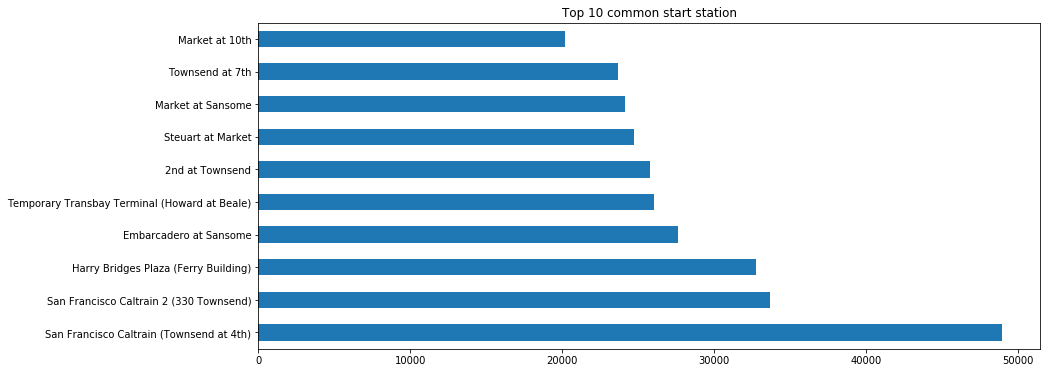

In [47]:
# top 10 common start station
trip['start_station_name'].value_counts().head(10).plot(kind='barh',figsize=(14,6))
plt.title('Top 10 common start station')
plt.show()

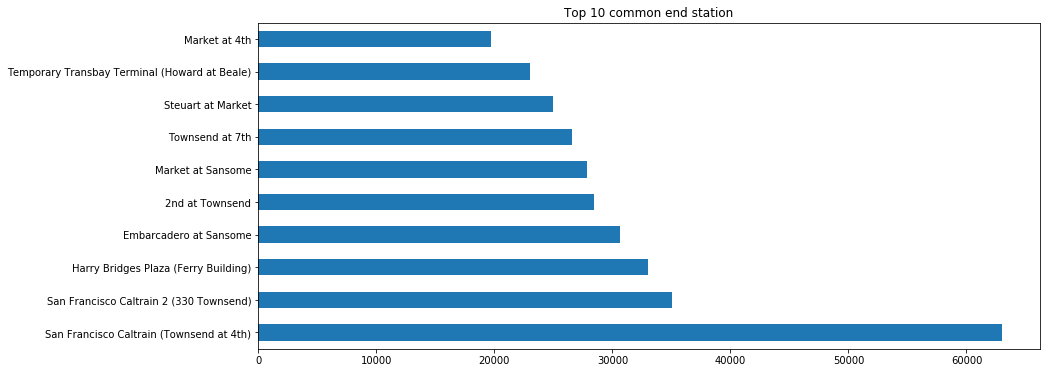

In [48]:
# top 10 common end station
trip['end_station_name'].value_counts().head(10).plot(kind='barh',figsize=(14,6))
plt.title('Top 10 common end station')
plt.show()

In [49]:
# anuual trip_counts by user type
total_count =trip.groupby(['date','subscription_type']).size().to_frame('count').reset_index()

In [50]:
total_count.head()

,date,subscription_type,count
0,2013-08-29,Customer,283
1,2013-08-29,Subscriber,459
2,2013-08-30,Customer,391
3,2013-08-30,Subscriber,308
4,2013-08-31,Customer,468


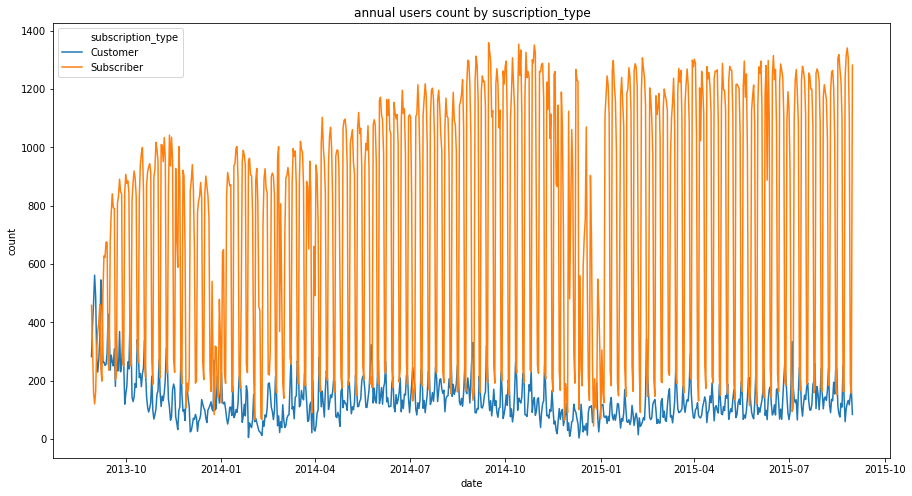

In [51]:
plt.figure(figsize=(15,8))
sns.lineplot(x='date',y='count',hue ='subscription_type',data=total_count)
plt.title('annual users count by suscription_type')
plt.show()

In [52]:
# total uesrs count by workingdays
workingday = trip.groupby(['workingday','subscription_type']).size()
workingday = workingday.unstack('subscription_type')

In [53]:
workingday.head()

subscription_type,Customer,Subscriber
workingday,,
False,40612,41305
True,60025,524930


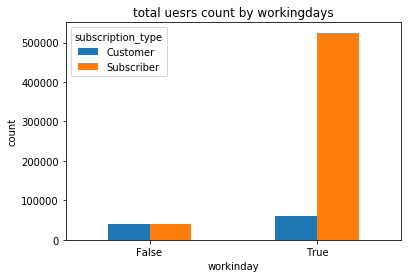

In [54]:
workingday.plot(kind='bar')
plt.xlabel('workinday')
plt.ylabel('count')
plt.xticks(rotation=360)
plt.title('total uesrs count by workingdays')
plt.show()

In [55]:
# total uesrs count by workingdays
holiday = trip.groupby(['holiday','subscription_type']).size()
holiday = holiday.unstack('subscription_type')

In [56]:
holiday

subscription_type,Customer,Subscriber
holiday,,
False,97100,559024
True,3537,7211


In [57]:
# total counts by month

In [58]:
monthly_count = trip.groupby('month').size().to_frame('count').reset_index()

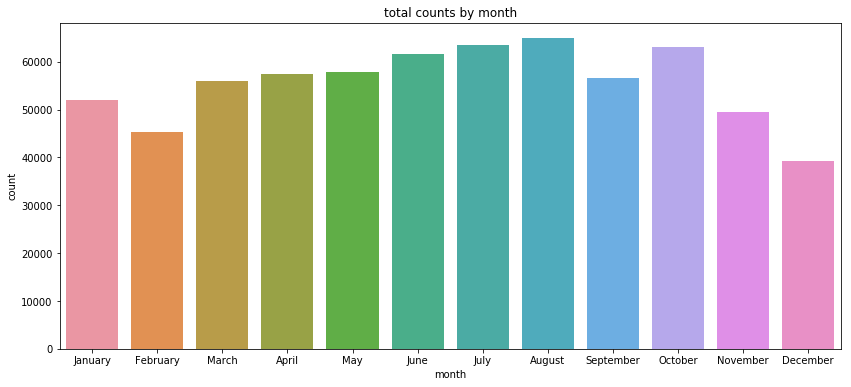

In [59]:
plt.figure(figsize=(14,6))
monthOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
sns.barplot(data=monthly_count, x="month", y="count",order=monthOrder)
plt.title('total counts by month')
plt.show()

In [60]:
# total counts by hour of the day across weekdays

In [61]:
hourly_count = trip.groupby(['hour','day']).size().to_frame('count').reset_index()

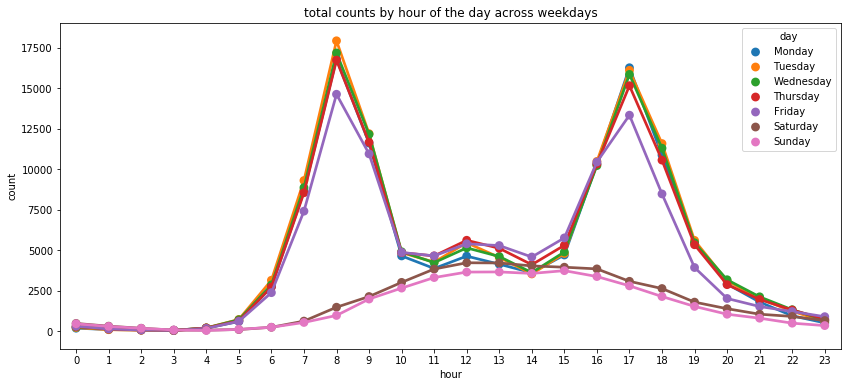

In [62]:
plt.figure(figsize=(14,6))
weekOrder =['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.pointplot(x='hour',y='count',hue ='day',hue_order= weekOrder,data=hourly_count)
plt.title('total counts by hour of the day across weekdays')
plt.show()

In [63]:
# total counts by hour of the day across subscription_type

In [64]:
hourly = trip.groupby(['hour','subscription_type']).size().to_frame('count').reset_index()

In [65]:
hourly.head()

,hour,subscription_type,count
0,0,Customer,634
1,0,Subscriber,1499
2,1,Customer,464
3,1,Subscriber,679
4,2,Customer,301


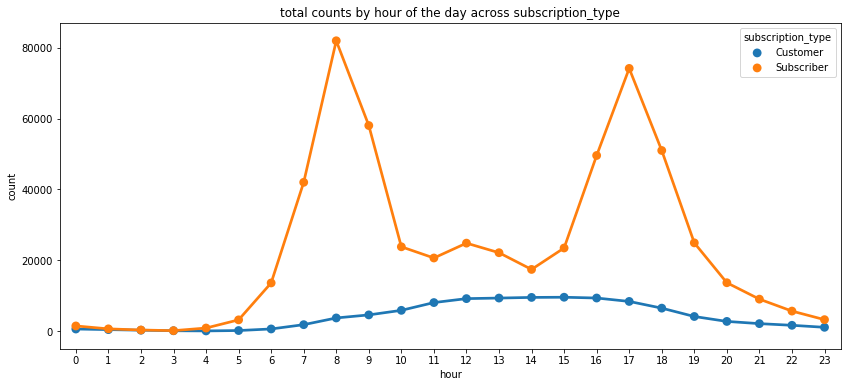

In [66]:
plt.figure(figsize=(14,6))
sns.pointplot(x='hour',y='count',hue ='subscription_type',data=hourly)
plt.title('total counts by hour of the day across subscription_type')
plt.show()

# merging with station and weather data

In [67]:
# rename and drop columns
station.rename(columns = {'name':'station_name'},inplace=True)
station.drop(['id','lat','long','installation_date'],axis=1,inplace=True)

In [68]:
station.head()

,station_name,dock_count,city
0,San Jose Diridon Caltrain Station,27,San Jose
1,San Jose Civic Center,15,San Jose
2,Santa Clara at Almaden,11,San Jose
3,Adobe on Almaden,19,San Jose
4,San Pedro Square,15,San Jose


In [69]:
trip.head()

,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,subscription_type,date,day,hour,month,week,holiday,workingday
0,1.050000,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,Subscriber,2013-08-29,Thursday,14,August,35,False,True
1,1.166667,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,Subscriber,2013-08-29,Thursday,14,August,35,False,True
2,1.183333,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,Subscriber,2013-08-29,Thursday,10,August,35,False,True
3,1.283333,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,Subscriber,2013-08-29,Thursday,11,August,35,False,True
4,1.383333,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,Subscriber,2013-08-29,Thursday,12,August,35,False,True


In [70]:
# create a DataFrame for machine learning 
df = trip.groupby(['date','start_station_name','holiday','workingday']).size().to_frame('trip_count').reset_index()
df.rename(columns={'start_station_name':'station_name'},inplace=True)

In [71]:
df.head()

,date,station_name,holiday,workingday,trip_count
0,2013-08-29,2nd at Folsom,False,True,12
1,2013-08-29,2nd at South Park,False,True,11
2,2013-08-29,2nd at Townsend,False,True,8
3,2013-08-29,5th at Howard,False,True,12
4,2013-08-29,Adobe on Almaden,False,True,3


In [72]:
# merge with station dataset
df = df.merge(station, how ='left',on='station_name')

In [73]:
df.head()

,date,station_name,holiday,workingday,trip_count,dock_count,city
0,2013-08-29,2nd at Folsom,False,True,12,19.0,San Francisco
1,2013-08-29,2nd at South Park,False,True,11,15.0,San Francisco
2,2013-08-29,2nd at Townsend,False,True,8,27.0,San Francisco
3,2013-08-29,5th at Howard,False,True,12,15.0,San Francisco
4,2013-08-29,Adobe on Almaden,False,True,3,19.0,San Jose


In [74]:
# QUESTION 2: how to deal with missing values?

In [75]:
df.isnull().sum()

date               0
station_name       0
holiday            0
workingday         0
trip_count         0
dock_count      1154
city            1154
dtype: int64

In [76]:
df[df.city.isnull()].station_name.value_counts()

Washington at Kearny          544
Post at Kearny                543
Broadway at Main               53
San Jose Government Center     14
Name: station_name, dtype: int64

In [77]:
df.dock_count.describe()

count    42010.000000
mean        18.069031
std          4.103455
min         11.000000
25%         15.000000
50%         19.000000
75%         19.000000
max         27.000000
Name: dock_count, dtype: float64

In [78]:
df[df.city=='San Francisco'].dock_count.describe()

count    24257.000000
mean        19.119058
std          3.736586
min         15.000000
25%         15.000000
50%         19.000000
75%         23.000000
max         27.000000
Name: dock_count, dtype: float64

In [79]:
df[df.city=='San Jose'].dock_count.describe()

count    9358.000000
mean       16.552896
std         3.666691
min        11.000000
25%        15.000000
50%        15.000000
75%        19.000000
max        27.000000
Name: dock_count, dtype: float64

In [80]:
df[df.city=='Redwood City'].dock_count.describe()

count    1775.000000
mean       18.149296
std         4.646187
min        15.000000
25%        15.000000
50%        15.000000
75%        25.000000
max        25.000000
Name: dock_count, dtype: float64

In [81]:
station_name_city = dict({'Washington at Kearny':'San Francisco','Post at Kearny':'San Francisco','Broadway at Main':'Redwood City','San Jose Government Center':'San Jose'})

In [82]:
df.city.fillna(df[df.city.isnull()].station_name.apply(lambda x:station_name_city[x]),inplace=True)

In [83]:
df.dock_count.fillna(df.dock_count.mean(),inplace=True)

In [84]:
#merge with weather

In [85]:
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,city,week
0,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,23.0,11.0,28.0,0.0,4.0,0,286.0,San Francisco,35
1,2013-08-30,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,7.0,29.0,13.0,35.0,0.0,2.0,0,291.0,San Francisco,35
2,2013-08-31,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,26.0,15.0,31.0,0.0,4.0,0,284.0,San Francisco,35
3,2013-09-01,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,25.0,13.0,29.0,0.0,4.0,0,284.0,San Francisco,35
4,2013-09-02,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,6.0,23.0,12.0,30.0,0.0,6.0,0,277.0,San Francisco,36


In [86]:
df.head()

,date,station_name,holiday,workingday,trip_count,dock_count,city
0,2013-08-29,2nd at Folsom,False,True,12,19.0,San Francisco
1,2013-08-29,2nd at South Park,False,True,11,15.0,San Francisco
2,2013-08-29,2nd at Townsend,False,True,8,27.0,San Francisco
3,2013-08-29,5th at Howard,False,True,12,15.0,San Francisco
4,2013-08-29,Adobe on Almaden,False,True,3,19.0,San Jose


In [87]:
df = df.merge(weather,how='left',on=['date','city'] )

In [88]:
df.head()

,date,station_name,holiday,workingday,trip_count,dock_count,city,max_temperature_f,mean_temperature_f,min_temperature_f,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,week
0,2013-08-29,2nd at Folsom,False,True,12,19.0,San Francisco,74.0,68.0,61.0,...,10.0,10.0,23.0,11.0,28.0,0.0,4.0,0,286.0,35
1,2013-08-29,2nd at South Park,False,True,11,15.0,San Francisco,74.0,68.0,61.0,...,10.0,10.0,23.0,11.0,28.0,0.0,4.0,0,286.0,35
2,2013-08-29,2nd at Townsend,False,True,8,27.0,San Francisco,74.0,68.0,61.0,...,10.0,10.0,23.0,11.0,28.0,0.0,4.0,0,286.0,35
3,2013-08-29,5th at Howard,False,True,12,15.0,San Francisco,74.0,68.0,61.0,...,10.0,10.0,23.0,11.0,28.0,0.0,4.0,0,286.0,35
4,2013-08-29,Adobe on Almaden,False,True,3,19.0,San Jose,81.0,72.0,63.0,...,10.0,10.0,16.0,7.0,24.0,0.0,4.0,0,320.0,35


In [89]:
df.isnull().sum()

date                              0
station_name                      0
holiday                           0
workingday                        0
trip_count                        0
dock_count                        0
city                              0
max_temperature_f                 0
mean_temperature_f                0
min_temperature_f                 0
max_dew_point_f                   0
mean_dew_point_f                  0
min_dew_point_f                   0
max_humidity                      0
mean_humidity                     0
min_humidity                      0
max_sea_level_pressure_inches     0
mean_sea_level_pressure_inches    0
min_sea_level_pressure_inches     0
max_visibility_miles              0
mean_visibility_miles             0
min_visibility_miles              0
max_wind_Speed_mph                0
mean_wind_speed_mph               0
max_gust_speed_mph                0
precipitation_inches              0
cloud_cover                       0
events                      

In [90]:
df.dtypes

date                              category
station_name                        object
holiday                           category
workingday                        category
trip_count                           int64
dock_count                         float64
city                              category
max_temperature_f                  float64
mean_temperature_f                 float64
min_temperature_f                  float64
max_dew_point_f                    float64
mean_dew_point_f                   float64
min_dew_point_f                    float64
max_humidity                       float64
mean_humidity                      float64
min_humidity                       float64
max_sea_level_pressure_inches      float64
mean_sea_level_pressure_inches     float64
min_sea_level_pressure_inches      float64
max_visibility_miles               float64
mean_visibility_miles              float64
min_visibility_miles               float64
max_wind_Speed_mph                 float64
mean_wind_s

In [91]:
for col in ['station_name','events','week']:
    df[col] = df[col].astype('category')

In [92]:
# how is the weather affect trip counts?

In [93]:
# temperature
temperature_count = df.groupby(['mean_temperature_f','city','workingday']).size().to_frame('count').reset_index()

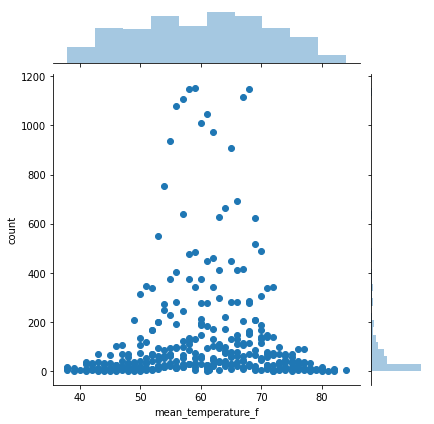

In [94]:
sns.jointplot('mean_temperature_f','count',data=temperature_count)

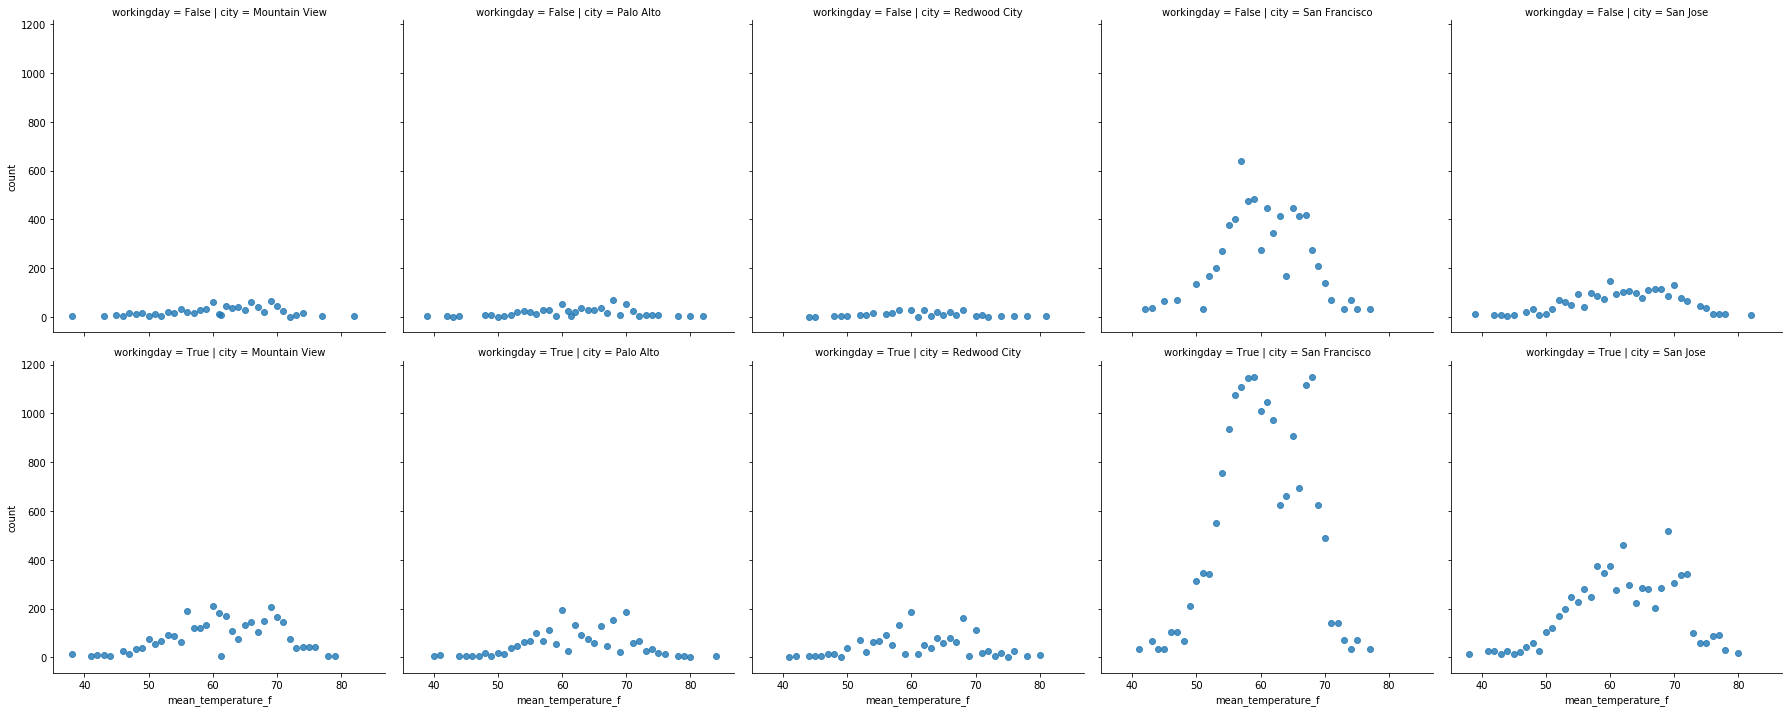

In [95]:
sns.lmplot('mean_temperature_f','count',row='workingday',col='city',data=temperature_count,fit_reg=False)

In [96]:
# wind speed
wind_count = df.groupby(['mean_wind_speed_mph','city','workingday']).size().to_frame('count').reset_index()

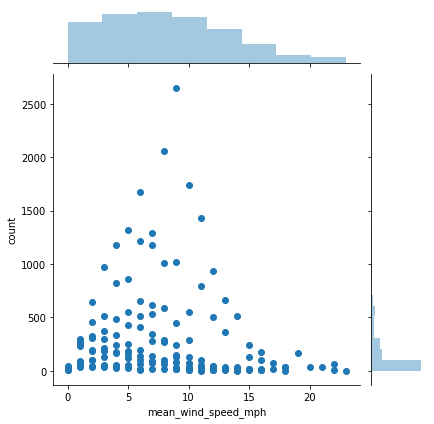

In [97]:
sns.jointplot('mean_wind_speed_mph','count',data=wind_count)

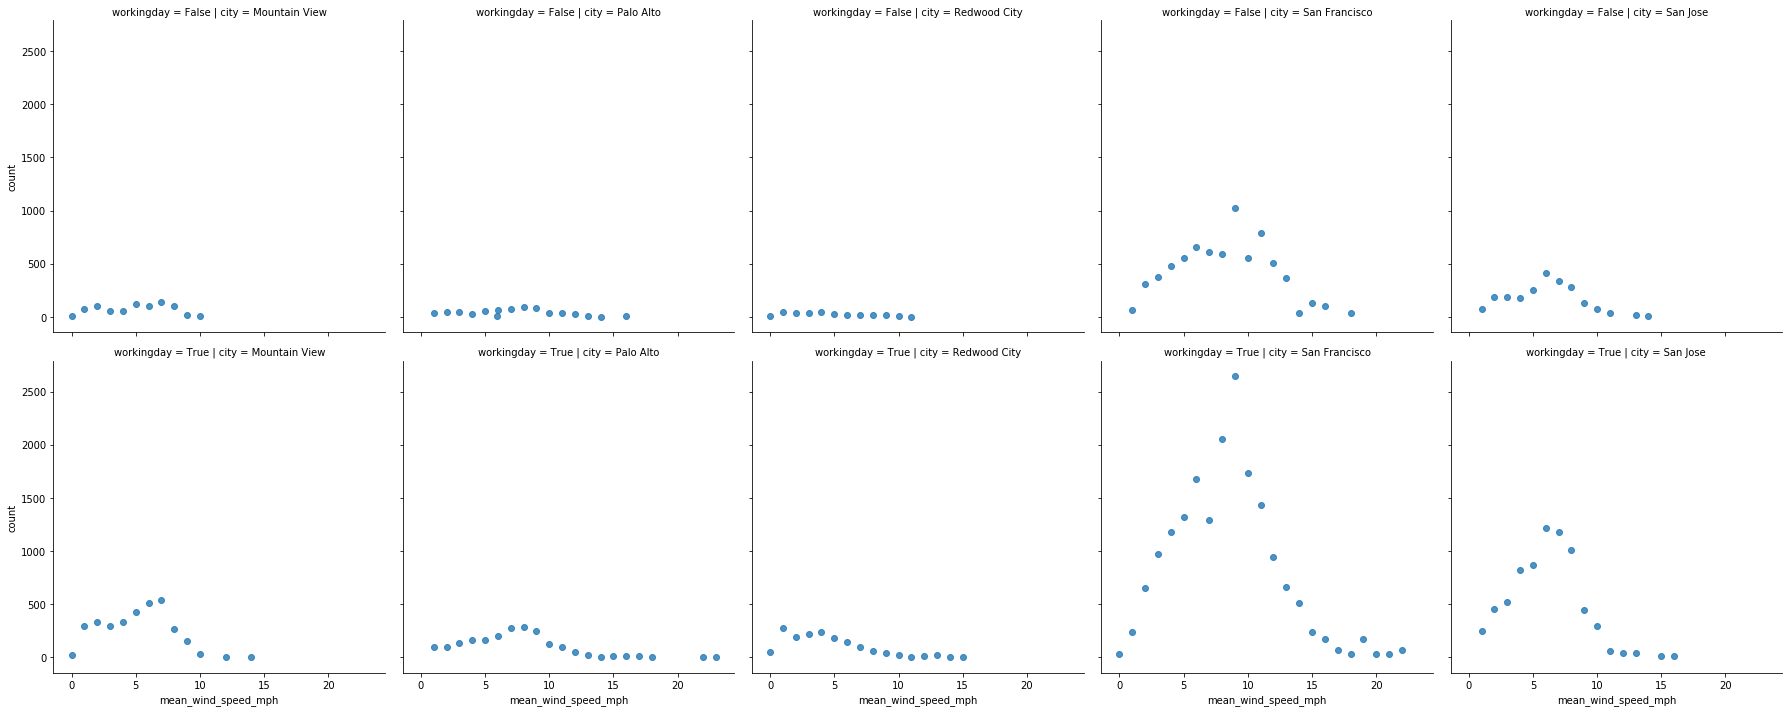

In [98]:
sns.lmplot('mean_wind_speed_mph','count',row='workingday',col='city',data=wind_count,fit_reg=False)

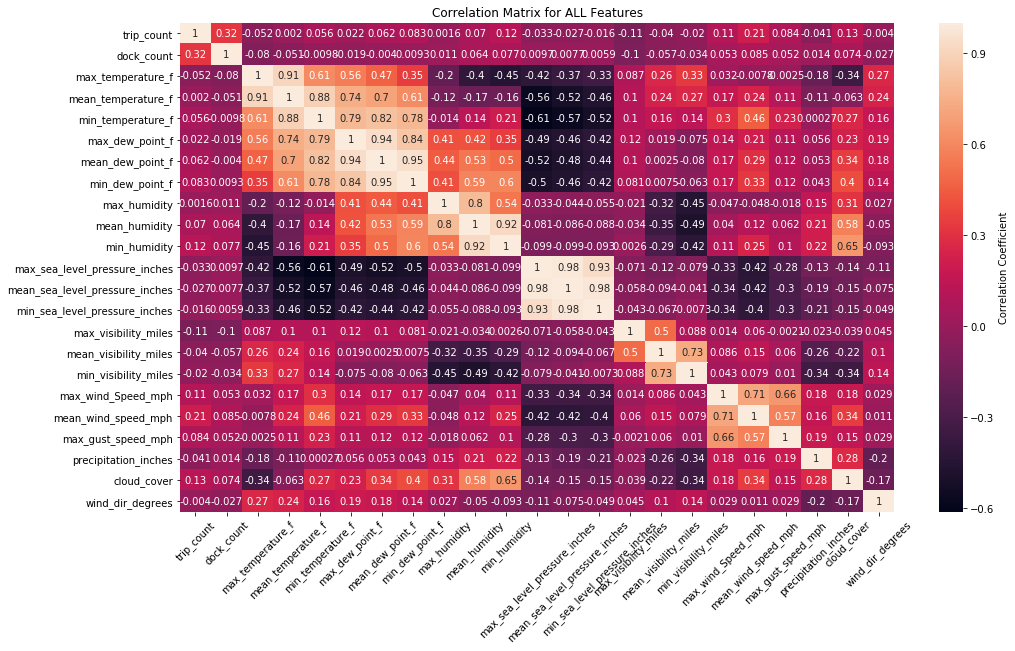

In [99]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), annot=True,cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Matrix for ALL Features")
plt.xticks(rotation=45)
plt.show()